In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
with open('SMSSpamCollection.txt', 'r') as f:
    data = f.read()
    # print(data)

In [4]:
splitted_data = data.split('\n')
splitted_data[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
splitted_data[0].split('\t')[1]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
x = []
y = []

for i in range(len(splitted_data)):
    split = splitted_data[i].split('\t')
    if len(split) == 2:
        y.append(split[0])
        x.append(split[1])

In [7]:
len(x)

5574

In [8]:
len(y)

5574

In [9]:
df = pd.DataFrame()

In [10]:
df['label'] = y

In [11]:
df['email_message'] = x

In [12]:
df

,label,email_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will Ã¼ b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [13]:
import re           # re = regular expression

In [14]:
college = ' JECRC Foundation @ Jaipur 2845445'

In [15]:
re.sub('[^a-zA-Z]', ' ',college) # replace every character with space other than chars from a-z and A-Z

' JECRC Foundation   Jaipur        '

In [16]:
re.sub('[a-zA-Z]', ' ',college) # replace every character with space from a-z and A-Z

'                  @        2845445'

In [17]:
for i in range(len(df['email_message'])):
    df['email_message'][i] = re.sub('[^a-zA-Z]', ' ',df['email_message'][i]).lower()

In [18]:
df

,label,email_message
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
2,spam,free entry in a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...
...,...,...
5569,spam,this is the nd time we have tried contact u...
5570,ham,will b going to esplanade fr home
5571,ham,pity was in mood for that so any other s...
5572,ham,the guy did some bitching but i acted like i d...


In [19]:
df['email_message'][0]

'go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   '

In [20]:
df['label'].value_counts()

label
ham     4827
spam     747
Name: count, dtype: int64

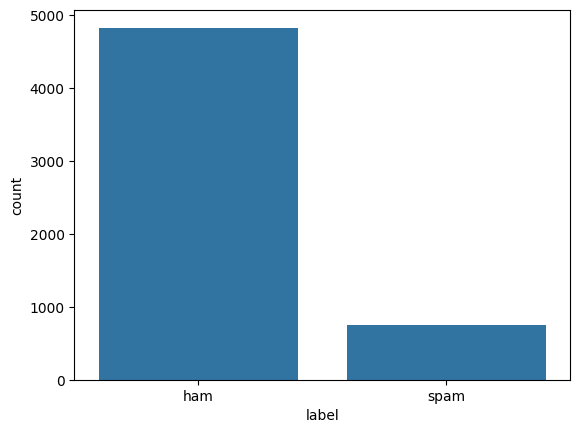

In [21]:
sns.countplot(x='label', data=df)
plt.show()

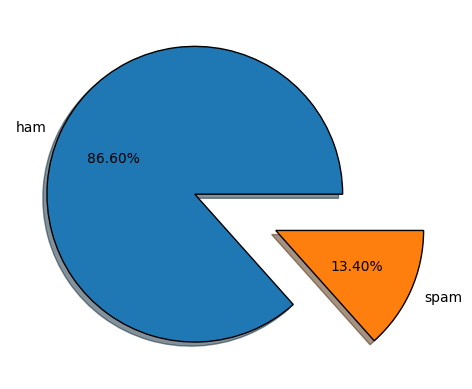

In [22]:
values = list(df['label'].value_counts().values)
labels = list(df['label'].value_counts().keys())
ls = [0,0.6]
plt.pie(values, labels=labels, wedgeprops={'ec': 'black'}, shadow=True, autopct='%1.2f%%', explode=ls)
plt.show()

In [23]:
ham = df[df['label'] == 'ham']
ham

,label,email_message
0,ham,go until jurong point crazy available only ...
1,ham,ok lar joking wif u oni
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives aro...
6,ham,even my brother is not like to speak with me ...
...,...,...
5567,ham,huh y lei
5570,ham,will b going to esplanade fr home
5571,ham,pity was in mood for that so any other s...
5572,ham,the guy did some bitching but i acted like i d...


In [24]:
spam = df[df['label'] == 'spam']
spam

,label,email_message
2,spam,free entry in a wkly comp to win fa cup fina...
5,spam,freemsg hey there darling it s been week s n...
8,spam,winner as a valued network customer you have...
9,spam,had your mobile months or more u r entitle...
11,spam,six chances to win cash from to po...
...,...,...
5539,spam,want explicit sex in secs ring ...
5542,spam,asked mobile if chatlines inclu in free ...
5549,spam,had your contract mobile mnths latest moto...
5568,spam,reminder from o to get pounds free call...


In [25]:
ham = df[df['label'] == 'ham'].sample(1000)

In [26]:
ham

,label,email_message
3239,ham,good no swimsuit allowed
3484,ham,hello my love how goes that day i wish you...
859,ham,spoons it is then okay
1185,ham,yo you around just got my car back
2156,ham,what year and how many miles
...,...,...
5415,ham,nite nite pocay wocay luv u more than n e thin...
1174,ham,dun need to pick ur gf
4023,ham,u gd lor go shopping i got stuff to do u wan ...
2916,ham,nothing lor a bit bored too then y dun u...


In [27]:
balanced_df = pd.concat([ham, spam])
balanced_df

,label,email_message
3239,ham,good no swimsuit allowed
3484,ham,hello my love how goes that day i wish you...
859,ham,spoons it is then okay
1185,ham,yo you around just got my car back
2156,ham,what year and how many miles
...,...,...
5539,spam,want explicit sex in secs ring ...
5542,spam,asked mobile if chatlines inclu in free ...
5549,spam,had your contract mobile mnths latest moto...
5568,spam,reminder from o to get pounds free call...


In [28]:
dt = {'ham':0, 'spam':1}

In [29]:
balanced_df['label'] = balanced_df['label'].map(dt)

In [30]:
balanced_df

,label,email_message
3239,0,good no swimsuit allowed
3484,0,hello my love how goes that day i wish you...
859,0,spoons it is then okay
1185,0,yo you around just got my car back
2156,0,what year and how many miles
...,...,...
5539,1,want explicit sex in secs ring ...
5542,1,asked mobile if chatlines inclu in free ...
5549,1,had your contract mobile mnths latest moto...
5568,1,reminder from o to get pounds free call...


In [31]:
x = balanced_df['email_message']
y = balanced_df['label']

In [32]:
x = x.values


In [33]:
# These classes represent our text data into nunerical values
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 

In [34]:
bow = CountVectorizer(max_features=2000, stop_words='english')  # max features divides the sentence in 2000 columns, stop_words = 'english' removes the stop words of the english language

In [35]:
x = bow.fit_transform(x)

In [36]:
x

<1747x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 14255 stored elements in Compressed Sparse Row format>

In [37]:
x = x.toarray()

In [38]:
x.shape , y.shape

((1747, 2000), (1747,))

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15)

In [41]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
y_test


23      0
5201    0
207     0
1458    1
1598    1
       ..
2292    0
629     1
1704    0
4660    0
4215    0
Name: label, Length: 263, dtype: int64

In [44]:
y_train

2208    0
4592    1
5139    1
2830    1
2542    0
       ..
1263    1
3423    1
244     0
4869    0
2530    0
Name: label, Length: 1484, dtype: int64

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr = LogisticRegression()

In [47]:
lr.fit(x_train, y_train)

LogisticRegression()

In [48]:
lr.score(x_train,y_train)

0.9905660377358491

In [49]:
lr.score(x_test, y_test)

0.9391634980988594

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
rfc = RandomForestClassifier()

In [52]:
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [53]:
rfc.score(x_train, y_train)

1.0

In [54]:
rfc.score(x_test, y_test)

0.9239543726235742

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
dtc = DecisionTreeClassifier()

In [57]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [58]:
dtc.score(x_train, y_train)

1.0

In [59]:
dtc.score(x_test, y_test)

0.8935361216730038

# NAIVE BAYES

We will use Naive Bayes algorithm because it is apt for data classification with text values

In [60]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [61]:
bnb = BernoulliNB()

In [62]:
bnb.fit(x_train, y_train)

BernoulliNB()

In [63]:
bnb.score(x_train, y_train) , bnb.score(x_test, y_test)

(0.9663072776280324, 0.9429657794676806)

In [64]:
mnb = MultinomialNB()

In [65]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [66]:
mnb.score(x_train, y_train) , mnb.score(x_test, y_test)

(0.9784366576819407, 0.9505703422053232)

In [67]:
import joblib

In [72]:
joblib.dump(mnb, 'multinomial_model.lb')

['multinomial_model.lb']

In [71]:
joblib.dump(bow, 'countVector.lb')

['countVector.lb']